In [1]:
import numpy as np
from ase import io

In [2]:
from toolbox.calculator.elecpot import WannierHartreePotentialCalculator
from toolbox.utils.unit import AU_TO_ANG

In [3]:
# Wannier spread [Bohr^2]
spread = 1.8816357541

atoms = io.read("coord.xyz")
dx = 1e-3
l_box = atoms.cell.cellpar()[2]
grids = np.arange(0.0, l_box, dx)
cross_area = np.linalg.norm(np.cross(atoms.cell[0], atoms.cell[1]))

obj = WannierHartreePotentialCalculator(
    grids=grids,
    l_box=l_box,
    cross_area=cross_area,
    spread_dict={
        "O": 0.244554 * AU_TO_ANG,
        "H": 0.200000 * AU_TO_ANG,
        "X": np.sqrt(spread / 3) * AU_TO_ANG,
    },
    charge_dict={"O": 6.0, "H": 1.0, "X": -2.0},
)
phi = obj.run(dname="./")

| | FFT took 0.00585999999999931 s
| | k-space arithmetics took 0.0026609999999998024 s
| | Inverse FFT took 0.005482999999999905 s


In [4]:
from matplotlib import pyplot as plt

from toolbox.io.cp2k import Cp2kHartreeCube
from toolbox import plot

plot.use_style("pub")

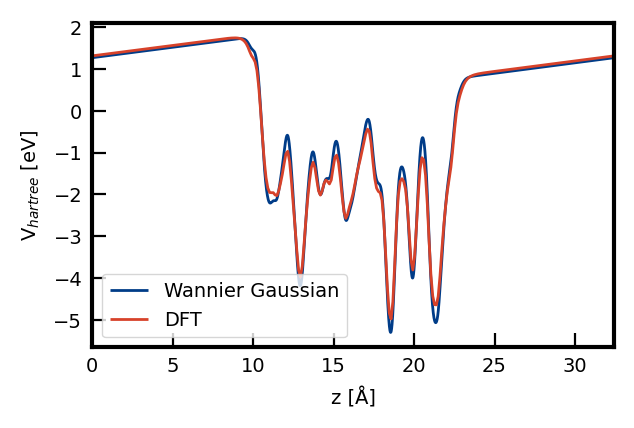

In [5]:
fig, ax = plt.subplots(figsize=[3, 2])

ax.plot(grids, phi, color="blue", label="Wannier Gaussian")

cube = Cp2kHartreeCube("cp2k-v_hartree-1_0.cube")
out = cube.get_ave_cube()
ax.plot(out[0], out[1], color="red", label="DFT")

plot.ax_setlabel(ax, "z [Å]", r"V$_{hartree}$ [eV]")
ax.set_xlim(0.0, l_box)

ax.legend()

plt.show()